In [291]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sn;

In [292]:
data=pd.read_csv("housing-prices/train.csv")

In [293]:
x=data['LotArea']

In [294]:
y=data['SalePrice']

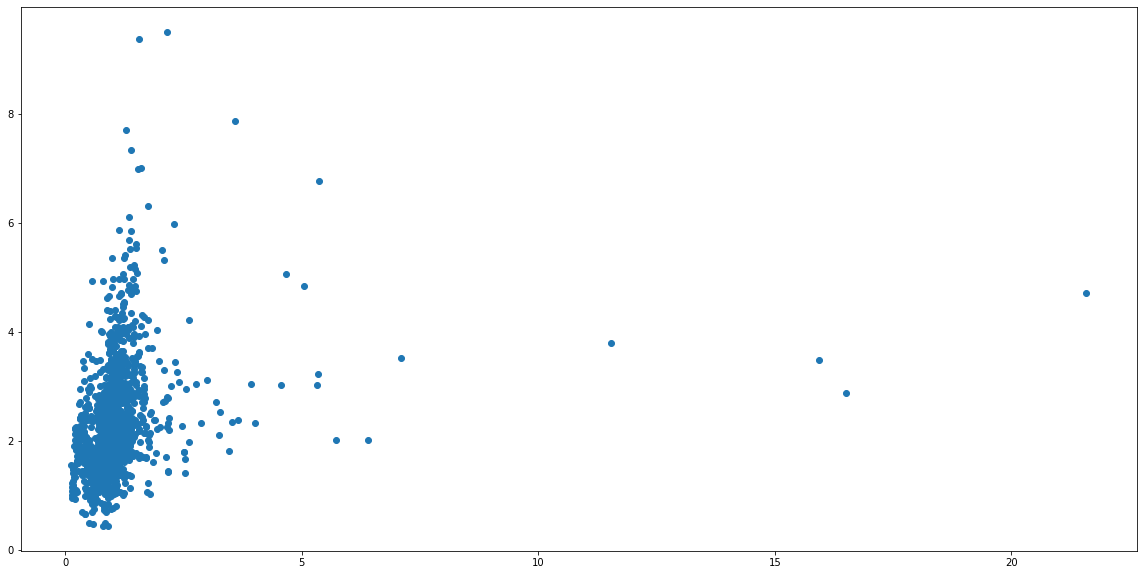

In [295]:
plt.figure(figsize=(20,10))
x=x/np.array(x).std()
y=y/np.array(y).std()
plt.scatter(x,y)
plt.show()

In [296]:
theta=[0,4]
m=len(x)

def cost(x,y,theta,m):
    sigma=0
    for i in range(m):
        sigma+=(theta[0]+theta[1]*x[i]-y[i])**2
    return sigma/(2*m)

In [297]:

    
def gradient_descent(x,y,theta,alpha,iteration,m):
    plt.scatter(x,y)
    xl=np.linspace(1,max(x))
    for t in range(iteration):
        t0=t1=0
        for i in range(m):
            t0+=(theta[0]+theta[1]*x[i]-y[i])
            t1+=(theta[0]+theta[1]*x[i]-y[i])*x[i]
        theta[0]=theta[0]-alpha*(t0)/m
        theta[1]=theta[1]-alpha*(t1)/m
        yl=theta[0]+theta[1]*xl
        plt.plot(xl,yl)
    return theta
        

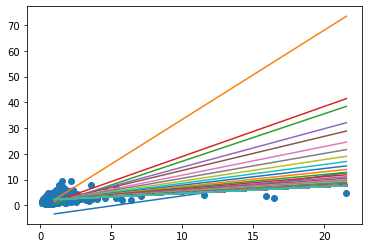

In [298]:
theta=gradient_descent(x,y,[0,10],0.500,200,m)
plt.show()

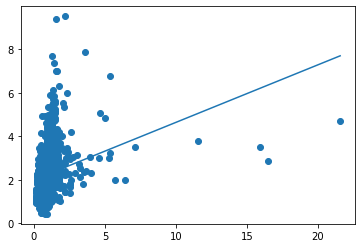

In [299]:
plt.scatter(x,y)
xl=np.linspace(1,max(x))
yl=theta[0]+theta[1]*xl
plt.plot(xl,yl)

In [300]:
data.select_dtypes(include='number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [301]:
x1=data[['LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','1stFlrSF', '2ndFlrSF',
        'BedroomAbvGr','TotRmsAbvGrd',
       'Fireplaces', 'GarageCars','OpenPorchSF']]
x1

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF
0,8450,7,5,2003,2003,856,854,3,8,0,2,61
1,9600,6,8,1976,1976,1262,0,3,6,1,2,0
2,11250,7,5,2001,2002,920,866,3,6,1,2,42
3,9550,7,5,1915,1970,961,756,3,7,1,3,35
4,14260,8,5,2000,2000,1145,1053,4,9,1,3,84
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,953,694,3,7,1,2,40
1456,13175,6,6,1978,1988,2073,0,3,7,2,2,0
1457,9042,7,9,1941,2006,1188,1152,4,9,2,1,60
1458,9717,5,6,1950,1996,1078,0,2,5,0,1,0


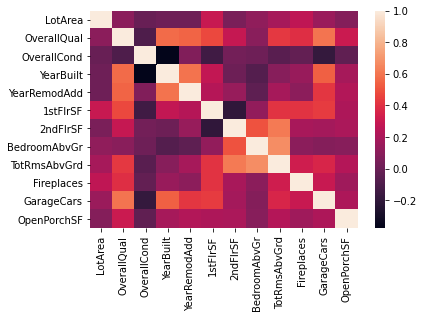

In [302]:
sn.heatmap(x1.corr())

In [303]:
np.array(x1).shape[1]

12

In [304]:
def feature_normalization(x):
    for i in range(np.array(x).shape[1]):
        x=x-x.mean(axis=0)
        x=x/x.max(axis=0)
    return x

In [306]:
x1=feature_normalization(np.array(x1))
y=y-y.mean()
y=y/y.max()

In [307]:
x1=np.hstack((np.ones((x1.shape[0],1)), x1))

In [309]:
x1.shape
x1

array([[ 1.        , -0.01009547,  0.2309043 , ..., -0.25681492,
         0.10429448,  0.02865998],
       [ 1.        , -0.00447827, -0.02546093, ...,  0.16212339,
         0.10429448, -0.09325718],
       [ 1.        ,  0.0035812 ,  0.2309043 , ...,  0.16212339,
         0.10429448, -0.00931422],
       ...,
       [ 1.        , -0.00720384,  0.2309043 , ...,  0.58106169,
        -0.34355828,  0.02666134],
       [ 1.        , -0.00390678, -0.28182616, ..., -0.25681492,
        -0.34355828, -0.09325718],
       [ 1.        , -0.00283219, -0.28182616, ..., -0.25681492,
        -0.34355828,  0.04265047]])

In [326]:
m=x1.shape[0]
def cost_multi(x,y,theta,m):
#     sigma=0
    n=x.shape[1]
    sigma=np.dot(x,theta)-y
    s=np.dot(sigma.transpose(),sigma)
    print(s)
        
    return sigma/(2*m)

In [327]:
def gradient_descent_multi(x,y,theta,alpha,iteration,m,n):
    t=np.zeros(x.shape[1])
    for k in range(iteration):
        for j in range(n):
            for i in range(m):
                t[j]+=(theta[j]*x[i,j]-y[i])*x[i,j]
            theta[j]=theta[j]-alpha*(t[j])/m
        c=cost_multi(x,y,theta,m)
    return theta

In [332]:
theta=np.zeros(x1.shape[1])
print(theta)
theta=gradient_descent_multi(np.array(x1),y,theta,0.0001,150,1460,x1.shape[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
27.93662988060279
27.93095829629081
27.922453440667226
27.911118338070068
27.896957019824843
27.879974523280374
27.860176890604123
27.837571167337146
27.812165400709077
27.783968637713592
27.752990922944697
27.71924329619449
27.68273778981296
27.643487425830205
27.601506212842146
27.55680914266023
27.509412186725918
27.45933229229098
27.40658737836426
27.35119633142618
27.29317900091173
27.232556194463164
27.169349672953572
27.103582145282317
27.035277262943882
26.96445961437113
26.891154719054434
26.815389021438264
26.737189884596322
26.656585583687047
26.57360529919089
26.488279109931046
26.400637985879253
26.31071378074842
26.21853922437379
26.12414791488456
26.027574310667713
25.928853722125996
25.828022303232103
25.72511704288098
25.620175756042322
25.513237074715395
25.404340438688404
25.293526086104382
25.180835043836222
25.066309117672724
24.94999088231832
24.831923671208695
24.712151566144787
24.59071938674758
24.46767267973636
24.34305

In [333]:
theta

array([-3.56299631e-17,  2.01363840e-03,  4.28891531e-02, -3.88371702e-03,
        5.68622291e-02,  5.73439624e-02,  1.03694627e-02,  1.25533527e-02,
        4.16644657e-03,  1.79969485e-02,  1.94793763e-02,  3.28642667e-02,
        6.52882597e-03])